# 1. Preliminary

## 1.1 Context

* We will analyze a very well known NLP dataset: tweets from disaster


* It is a Kaggle competition, which offers a simple but good level textual dataset to be able to make its weapons in NLP


* The dataset is here [https://www.kaggle.com/competitions/nlp-getting-started/data]


* Please use the **train** dataset


* In this 1st part we are just play and discover with this dataset

## 1.2 Requirements

You have to install  : 

* pandas
* numpy
* matplotlib
* seaborn

## 1.3 Imports

In [3]:
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Graphics and options

In [4]:
sns.set()

## 1.5 Loading data

In [ ]:
# !tree

![repo](./img/repo.jpg)

In [5]:
# our file

data = "./data/source/"
os.listdir(data)

['twit_from_disaster_train.csv', 'superheroes_nlp_dataset.csv']

In [6]:
# load dataframe

fn = data + 'twit_from_disaster_train.csv'
df = pd.read_csv(fn)

In [7]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 2. First Tour

## 2.1 Display

In [8]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.tail(5)

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [12]:
df.sample(10)

,id,keyword,location,text,target
1209,1741,buildings%20burning,GO BLUE! HAIL YES!!,@1acd4900c1424d1 @FoxNews no one is rioting bu...,1
6744,9663,tornado,"Gurgaon, Haryana.",#TornadoGiveaway åÊ #thebookclub åÊ Join in!! ...,0
5368,7659,panic,Narnia,I added a video to a @YouTube playlist http://...,0
1440,2076,casualty,NaN,UNPREDICTABLE DISCONNECTED AND SOCIAL CASUALTY...,1
75,109,accident,NaN,RT @SleepJunkies: Sleeping pills double your r...,0
6811,9757,tragedy,America,@CSAresu American Tragedy http://t.co/SDmrzG...,1
1534,2216,chemical%20emergency,NaN,THE CHEMICAL BROTHERS to play The Armory in SF...,0
4281,6084,heat%20wave,"Nebraska, Colorado & The GLOBE",weather warfare Follow the Money This Governme...,1
5846,8352,ruin,NaN,Always gotta ruin my mood,0
4285,6088,hellfire,NaN,Hellfire is surrounded by desires so be carefu...,0


## 2.2 Structure

In [13]:
df.shape

(7613, 5)

In [14]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [17]:
df.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [18]:
tmp = df.nunique()
tmp

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [19]:
tmp[tmp < 10]

target    2
dtype: int64

In [20]:
tmp[tmp > 1000]

id          7613
location    3341
text        7503
dtype: int64

## 2.3 NaN and duplicated

In [21]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [22]:
df.isna().mean()

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

In [23]:
df.isna().mean().sort_values()

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

<AxesSubplot:>

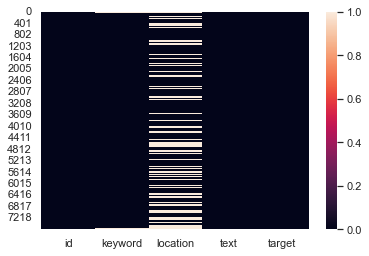

In [24]:
sns.heatmap(df.isna())

<AxesSubplot:>

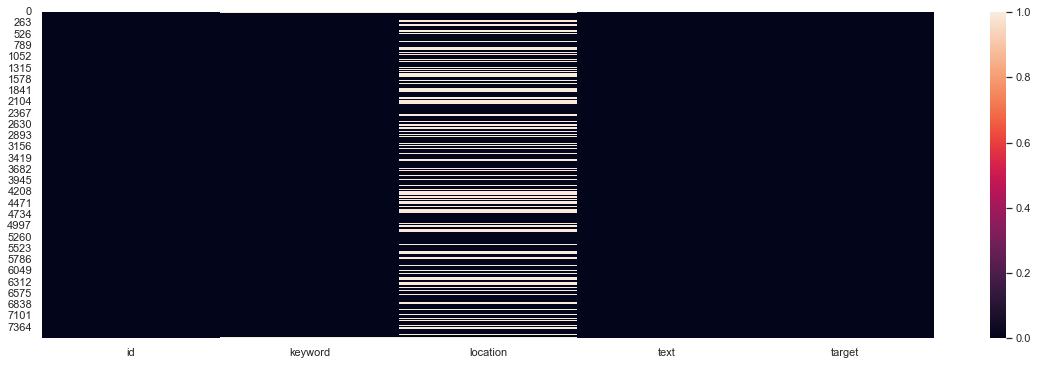

In [25]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))
sns.heatmap(df.isna())

In [26]:
df.duplicated().sum()

0

In [27]:
df.duplicated(subset="text").sum()

110

In [28]:
for col in df.columns : 
    n = df.duplicated(subset=col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : id -> duplicated : 0
col : keyword -> duplicated : 7391
col : location -> duplicated : 4271
col : text -> duplicated : 110
col : target -> duplicated : 7611


In [30]:
df.duplicated(subset="text",keep="first")

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609     True
7610     True
7611     True
7612    False
Length: 7613, dtype: bool

In [31]:
idx = df.duplicated(subset="text", keep="first")
df.loc[idx, : ].sort_values("text")

,id,keyword,location,text,target
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
3461,4952,exploded,NaN,that exploded &amp; brought about the\nbeginni...,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1


## 2.4 Data inspection

In [32]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [33]:
df.describe(include=object)

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


# 3. Cleaning

## 3.1 Select columns

In [34]:
tmp = df.dtypes
tmp

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [35]:
cols = ["text", "target"]
df = df[cols]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 3.2 Drop NaN

In [36]:
df.isna().mean()

text      0.0
target    0.0
dtype: float64

## 3.3 Duplicated

In [37]:
df.shape

(7613, 2)

In [38]:
idx = df.duplicated(subset="text",keep="first")
df.loc[idx, : ].sort_values("text")

,text,target
4299,#Allah describes piling up #wealth thinking it...,0
4312,#Allah describes piling up #wealth thinking it...,1
6366,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...
3461,that exploded &amp; brought about the\nbeginni...,0
6103,that horrible sinking feeling when youÛªve be...,0
6094,that horrible sinking feeling when youÛªve be...,0
6123,that horrible sinking feeling when youÛªve be...,1


In [39]:
df.drop_duplicates(subset="text", inplace=True)

# 4. Exploratory Data Analysis

## 4.1 Target

In [40]:
df.describe()

,target
count,7503.000000
mean,0.426230
std,0.494561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [41]:
df.target.value_counts()

0    4305
1    3198
Name: target, dtype: int64

In [42]:
df.target.value_counts(normalize=True)

0    0.57377
1    0.42623
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

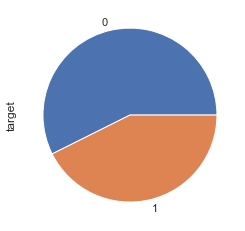

In [43]:
df.target.value_counts().plot(kind="pie")

## 4.2 Length

In [44]:
df.describe(include="object")

,text
count,7503
unique,7503
top,Our Deeds are the Reason of this #earthquake M...
freq,1


In [45]:
df.text.apply(lambda i : len(i))

0        69
1        38
2       133
3        65
4        88
       ... 
7604    136
7605    114
7606    121
7608     83
7612     94
Name: text, Length: 7503, dtype: int64

/Users/alexandre.gazagnes/Desktop/cours/fr/analysez-des-donnes-textuelles/partie-1/tp/env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

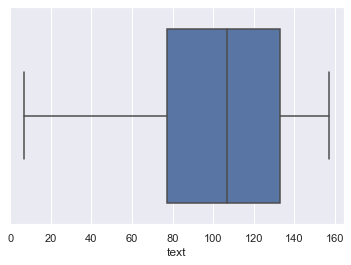

In [46]:
tmp = df.text.str.len()
sns.boxplot(tmp)

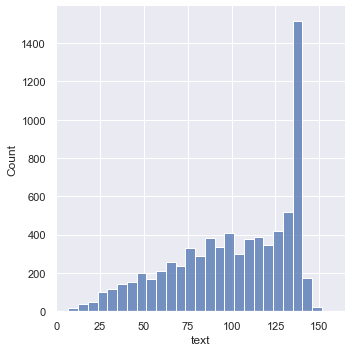

In [47]:
sns.displot(tmp)


In [49]:
df["_len_txt"] = tmp
df.head()

,text,target,_len_txt
0,Our Deeds are the Reason of this #earthquake M...,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are ...,1,133
3,"13,000 people receive #wildfires evacuation or...",1,65
4,Just got sent this photo from Ruby #Alaska as ...,1,88


## 4.3 Multivariate analysis

In [50]:
corr = df.corr()
corr

,target,_len_txt
target,1.000000,0.180997
_len_txt,0.180997,1.000000


<AxesSubplot:>

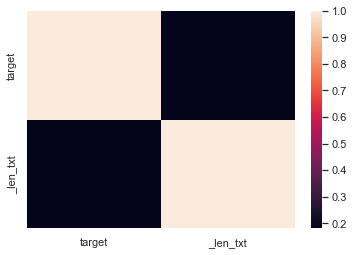

In [51]:
sns.heatmap(corr)

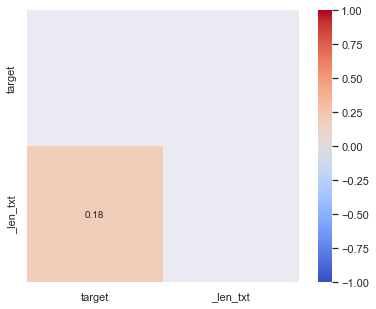

In [52]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

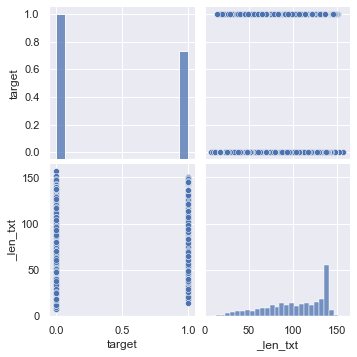

In [53]:
sns.pairplot(df)

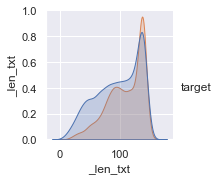

In [54]:
sns.pairplot(df, hue="target")

In [55]:
df.sort_values("_len_txt").head(10)

,text,target,_len_txt
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
4971,Meltdown,0,8
24,LOOOOOOL,0,8
3670,fatality,0,8
30,The end!,0,8
28,Cooool :),0,9
3667,Fatality!,0,9
6705,Thunder???,0,10


In [56]:
df.sort_values("_len_txt").tail(10)

,text,target,_len_txt
261,@Barbi_Twins We need help-horses will die! Ple...,0,148
2301,Nah but srsly b4 u demolish ur partner's face ...,0,148
6945,@helene_yancey GodsLove &amp; #thankU my siste...,1,148
257,@willienelson We need help! Horses will die!Pl...,1,148
2718,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,1,149
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151
4801,It's was about 2:30 in the morning&amp;I went ...,0,152
1270,when you're taking a shower and someone flushe...,0,157


In [57]:
df.drop(columns="_len_txt", inplace=True)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.to_csv("data/cleaned/df_cleaned.csv", index=False)

## 4.4. Explore corpus and documents

###  4.4.1 print N random documents 

In [58]:
df_samp = df.sample(20)
df_samp

,text,target
7047,Map: Typhoon Soudelor's predicted path as it a...,1
3206,@Glenstannard @EssexWeather do you know where ...,1
1931,@Reddakushgodd she said a few months. But I ge...,0
5849,fresh out da shower lookss ?? (still loving th...,0
7343,PHOTOS: The Rocky Fire has grown into Californ...,1
1325,If YouÛªre Not Paying Attention to Your Influ...,0
1146,Japan Marks 70th Anniversary of Hiroshima Atom...,1
2702,A new favorite: Trivium - Detonation by @rrusa...,0
845,What is the biggest regret you have in hearths...,0
7583,Pic of 16yr old PKK suicide bomber who detonat...,1


In [59]:
for idx, ser in df_samp.iterrows() : 
    print(ser["text"])

Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/0XCb7yeqmw
@Glenstannard @EssexWeather do you know where abouts as I heard emergency services near by
@Reddakushgodd she said a few months. But I get a curfew for out time smfh
fresh out da shower lookss ?? (still loving this new hair does it ruin my brand?) #yes https://t.co/T2Kk8fya77
PHOTOS: The Rocky Fire has grown into California's most destructive wildfire this year. http://t.co/h9v4HoWtiP http://t.co/8IcSesHbj3
If YouÛªre Not Paying Attention to Your Influencers YouÛªre Burning Money | SocialTimes http://t.co/Ptc0xcRAGY
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/3EV07PPaPn
A new favorite: Trivium - Detonation by @rrusa https://t.co/cubdNsNuvt on #SoundCloud
What is the biggest regret you have in hearthstone? http://t.co/vcIrn1Md8v
Pic of 16yr old PKK suicide bomber who detonated bomb in Turkey Army trench released http://t.

In [60]:
for idx, ser in df_samp.iterrows(): 
    txt_1 = f"target : {ser['target']}\n"
    print(txt_1 + ser['text']+ "..." + "\n\n")

target : 1
Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by SÛ_ http://t.co/0XCb7yeqmw...


target : 1
@Glenstannard @EssexWeather do you know where abouts as I heard emergency services near by...


target : 0
@Reddakushgodd she said a few months. But I get a curfew for out time smfh...


target : 0
fresh out da shower lookss ?? (still loving this new hair does it ruin my brand?) #yes https://t.co/T2Kk8fya77...


target : 1
PHOTOS: The Rocky Fire has grown into California's most destructive wildfire this year. http://t.co/h9v4HoWtiP http://t.co/8IcSesHbj3...


target : 0
If YouÛªre Not Paying Attention to Your Influencers YouÛªre Burning Money | SocialTimes http://t.co/Ptc0xcRAGY...


target : 1
Japan Marks 70th Anniversary of Hiroshima Atomic Bombing http://t.co/3EV07PPaPn...


target : 0
A new favorite: Trivium - Detonation by @rrusa https://t.co/cubdNsNuvt on #SoundCloud...


target : 0
What is the biggest regret you

### 4.4.2 print documents vs target

In [61]:
def print_sample(sub_df, n_samp=10) : 
    """print out n_samp documents from a corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows(): 

        txt_1 = f"target : {ser['target']}\n"
        print(txt_1+ser['text']+ "..." + "\n\n")

In [62]:
df_1 = df[df.target == 1]
df_1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [63]:
# print 10 docs of target == 1 

print_sample(df_1)

target : 1
'Food crematoria' provoke outrage amid crisis famine memories... http://t.co/fABVlvN5MS...


target : 1
#KCA #VoteJKT48ID mbataweel: #RIP #BINLADEN Family members who killed in an airplane's accident...


target : 1
JAX issues Hazardous Weather Outlook (HWO)  http://t.co/u9fCb8dz3h #WX...


target : 1
Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov...


target : 1
Erdogan's Bloody Gambit: on July 20 a suicide bombing in Turkey took the lives of 31 socialists in SuruÌ¤ http://t.co/z6xAUIDRXu @Shareaholic...


target : 1
Typhoon Soudelor taking dead aim at Taiwan http://t.co/3Ac5wuy1R0...


target : 1
Unlicensed teen driver among 2 killed in NC crash http://t.co/Woc6AkEHYX...


target : 1
@mylittlepwnies3 @Early__May @AnathemaZhiv @TonySandos much of which has to do with lebanon 80s attack/ iran hostage crisis/ Libya Pan am...


target : 1
FedEx stops shipping potential bioterror pathogens http:

In [64]:
# print 10 docs of target == 0

print_sample(df[df.target==0])

target : 0
@tyleroakley IM SCREAMING...


target : 0
Well me and dad survived my driving ????????...


target : 0
@_itsmegss_ I think it is. well it's bloody barking now...


target : 0
#socialmedia news - New Facebook Page Features Seek to Help Personalize the Customer Experience http://t.co/nbizaTlsmV...


target : 0
Mortal Kombat X: All Fatalities On Meat Predator.
https://t.co/IggFNBIxt5...


target : 0
@Ayshun_Tornado then don't...


target : 0
How do you call yourself a base conservative when u think it's okay 2 duck military service &amp; contribute thousands 2 #HillaryClinton 2012?...


target : 0
Looking for a #Defendant #Catastrophic Injury Solicitor #jobs http://t.co/Gz27aUDyHa http://t.co/P4EKgC9sIG...


target : 0
Brunette teen Giselle Locke teases at home http://t.co/qew4c5M1xd View and download video...


target : 0
Thank you @FedEx for no longer shipping live microbes for the Department of Defense

http://t.co/zAHNEwJrI8...


